# TASK 2

Intern: Sakshi Vaity

Batch: FEB BATCH A35

Domain: Data Science

Task 2: MOVIE RATING PREDICTION WITH PYTHON

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IMDb Movies India.csv',encoding='latin1')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.shape

(15509, 10)

## Removing Null Values

In [5]:
df_final = df.dropna()

In [6]:
df_final.shape

(5659, 10)

In [7]:
df_final.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [8]:
df_final.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [9]:
df_final.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


## Visualize Data

In [10]:
df['Genre'].unique()

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [11]:
rating_dist = df['Rating'].value_counts()

In [12]:
attributes = ['Name','Year','Duration','Rating','Votes']
df.dropna(subset = attributes,inplace=True)
missing_val = df.isna().sum()

In [13]:
movie_name_rating = df[['Name','Rating']]
movie_name_rating.head()

,Name,Rating
1,#Gadhvi (He thought he was Gandhi),7.0
3,#Yaaram,4.4
5,...Aur Pyaar Ho Gaya,4.7
6,...Yahaan,7.4
8,?: A Question Mark,5.6


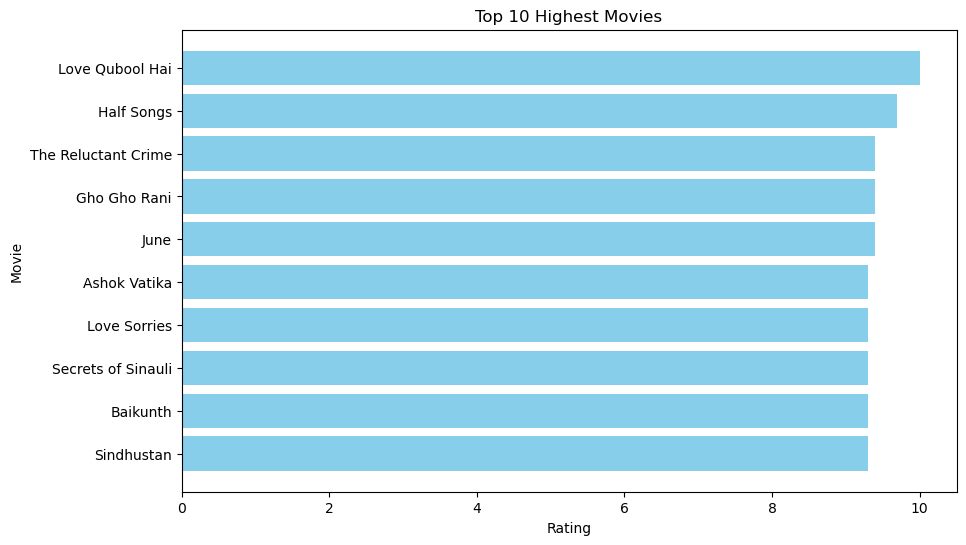

In [14]:
top_rated_movies = df.sort_values(by='Rating',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_rated_movies['Name'],top_rated_movies['Rating'], color = 'skyblue')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 Highest Movies')
plt.gca().invert_yaxis()
plt.show()

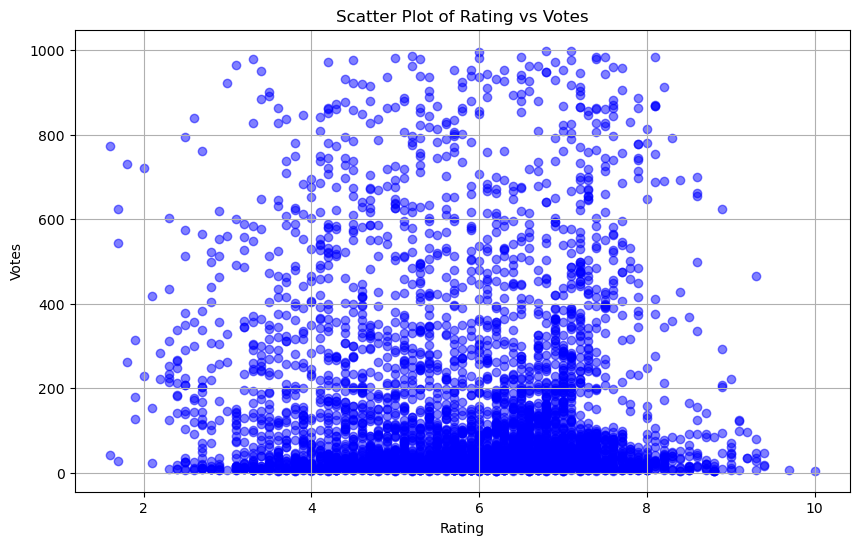

In [15]:
df['Votes'] = pd.to_numeric(df['Votes'],errors='coerce')
plt.figure(figsize= (10, 6))
plt.scatter(df['Rating'],df['Votes'],alpha=0.5,color='b')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter Plot of Rating vs Votes')
plt.grid(True)
plt.show()

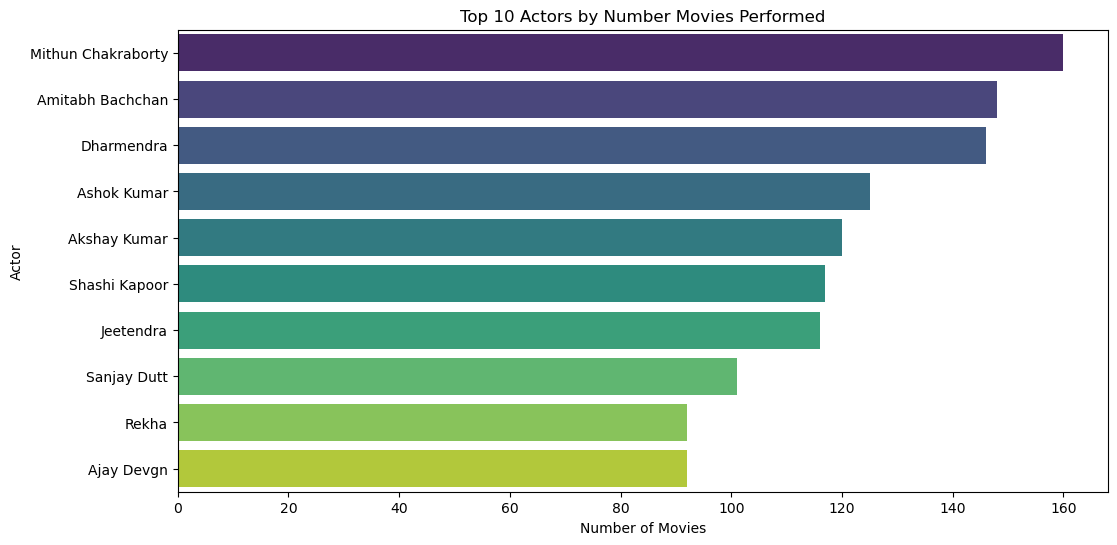

In [16]:
actors = pd.concat([df['Actor 1'],df['Actor 2'],df['Actor 3']])
actor_counts = actors.value_counts().reset_index()
actor_counts.columns = ['Actor','Number of Movies']
plt.figure(figsize=(12,6))
sns.barplot(x='Number of Movies',y='Actor',data = actor_counts.head(10),palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number Movies Performed')
plt.show()

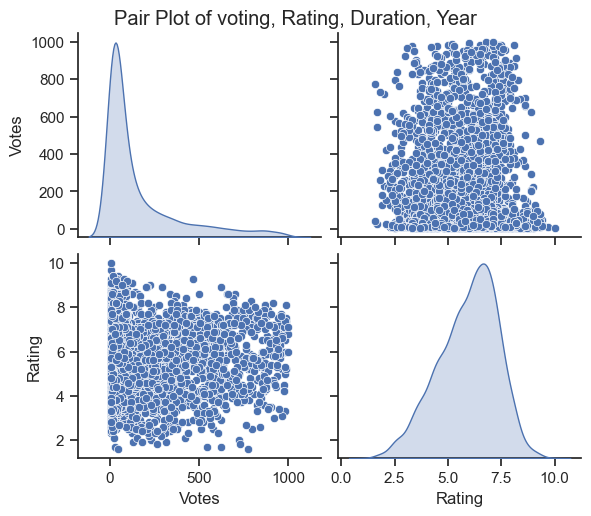

In [17]:
import warnings
warnings.filterwarnings('ignore')

columns_of_interest = ['Votes','Rating','Duration','Year']
sns.set(style='ticks')
sns.pairplot(df[columns_of_interest],diag_kind='kde',markers='o',palette='viridis',height=2.5,aspect=1.2)
plt.suptitle('Pair Plot of voting, Rating, Duration, Year',y=1.02)
plt.show()

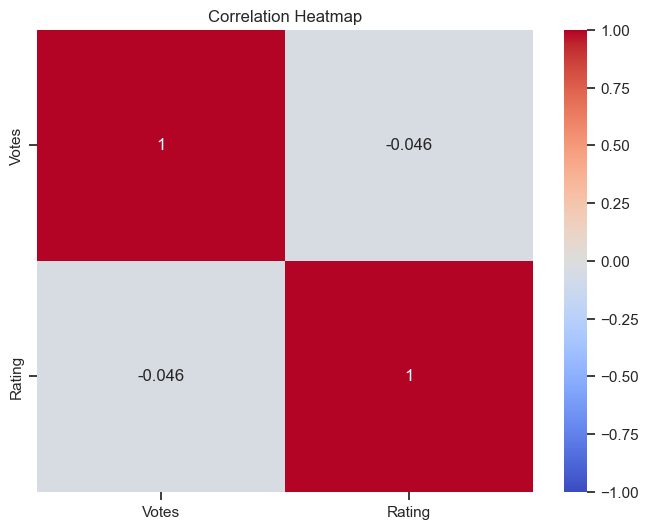

In [18]:
numerical_columns = ['Votes','Rating']
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# Example: Extract year from 'Year' column
df['Year'] = df['Year'].str.extract(r'(\d+)').astype(float)

# Example: Create a feature for the total number of actors
df['Total_Actors'] = df[['Actor 1', 'Actor 2', 'Actor 3']].notnull().sum(axis=1)

# Linear Regression:

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['Year', 'Total_Actors']] 
y = df['Rating']  

# Splitted data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Implementing the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.7826143668132561


In [22]:
new_data = pd.DataFrame({
    'Year': [2023, 2022],            
    'Total_Actors': [5, 4],        
})

#predicting sample data here
predicted_ratings = model.predict(new_data)

print("Predicted Ratings:", predicted_ratings)


Predicted Ratings: [4.29789948 4.90659277]


# Random Forest:

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Select features and target variable
X = df[['Year', 'Total_Actors']] 
y = df['Rating']  

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Random Forest)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Random Forest):", mse)


Mean Squared Error (Random Forest): 1.6928137078387562


In [27]:
#predicting sample data here
predicted_ratings = rf_model.predict(new_data)

print("Predicted Ratings:", predicted_ratings)


Predicted Ratings: [6.51274749 6.51274749]


# Decision Tree

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Select features and target variable
X = df[['Year', 'Total_Actors']] 
y = df['Rating']  

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Decision Tree)
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred = tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Decision Tree):", mse)


Mean Squared Error (Decision Tree): 1.7035624821125441


In [28]:
#predicting sample data here
predicted_ratings = tree_model.predict(new_data)

print("Predicted Ratings:", predicted_ratings)

Predicted Ratings: [6.53076923 6.53076923]


# predcition by KNN algorithm

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Select features and target variable
X = df[['Year', 'Total_Actors']] 
y = df['Rating']  

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (KNN)
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (KNN):", mse)


Mean Squared Error (KNN): 1.9801062339880444


In [29]:
#predicting sample data here
predicted_ratings = knn_model.predict(new_data)

print("Predicted Ratings:", predicted_ratings)

Predicted Ratings: [6.08 6.08]
